## Task 1: Exploratory Data Analysis (EDA) and Business Insights

Downloading The Dataset

In [ ]:
import gdown

# Replace with your Google Drive file IDs
file_ids = [
    '1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE',
    '1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0',
    '1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'
]

# Define output filenames for each file
output_files = ['Customers.csv', 'Products.csv', 'Transactions.csv']

# Download the files
for file_id, output in zip(file_ids, output_files):
    url = f'https://drive.google.com/uc?export=download&id={file_id}'
    gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/Customers.csv
100%|██████████| 8.54k/8.54k [00:00<00:00, 16.4MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/Products.csv
100%|██████████| 4.25k/4.25k [00:00<00:00, 8.74MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/Transactions.csv
100%|██████████| 54.7k/54.7k [00:00<00:00, 52.8MB/s]


Importing Libraries

In [ ]:
# First, I will import all the necessary libraries that I will be using throughout the analysis.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

Reading & Analyzing Dataset

In [ ]:
# Now, let's load the datasets into Pandas DataFrames.
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Let's take a quick look at the info of each dataset to understand their structure.
print("Customers Data Info:")
print(customers.info())
print("\nProducts Data Info:")
print(products.info())
print("\nTransactions Data Info:")
print(transactions.info())

Customers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

 Next, I’ll generate summary statistics for each dataset. This helps me get an overall idea of the numerical values # (like counts, means, min, max) across all columns.

In [ ]:
# Next, I’ll generate summary statistics for each dataset. This helps me get an overall idea of the numerical values
# (like counts, means, min, max) across all columns.
print("\nCustomers Summary:")
print(customers.describe())
print("\nProducts Summary:")
print(products.describe())
print("\nTransactions Summary:")
print(transactions.describe())



Customers Summary:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Summary:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Transactions Summary:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


Now, I will create a bar chart to visualize how customers are distributed across different regions. This will help me understand where the majority of my customers are located.

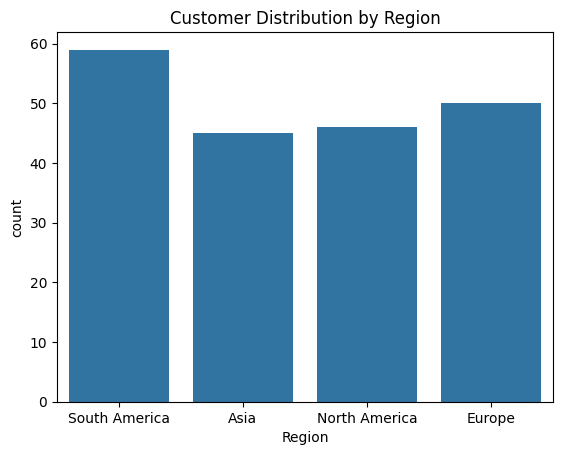

In [ ]:

sns.countplot(x='Region', data=customers)
plt.title('Customer Distribution by Region')
plt.show()


Next, I’ll create a box plot to visualize the distribution of product prices. This will also help me quickly identify any outliers in product prices.

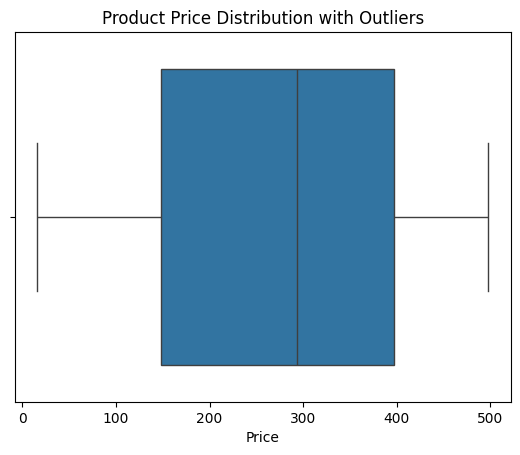

In [ ]:
sns.boxplot(x='Price', data=products)
plt.title('Product Price Distribution with Outliers')
plt.show()


I will now compute the correlation matrix for the numeric columns in the transactions dataset to see how the variables are related to each other, and visualize it as a heatmap.

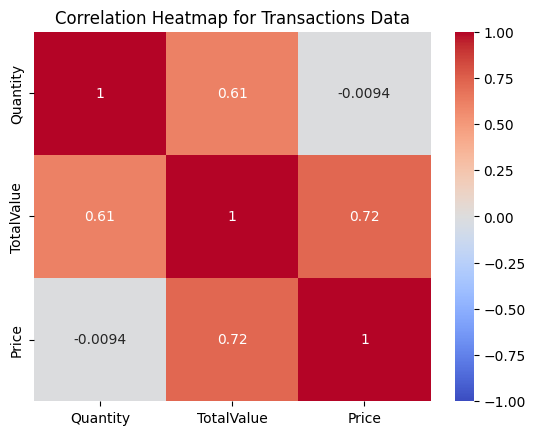

In [ ]:

numeric_cols = transactions.select_dtypes(include=[np.number]).columns
corr = transactions[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Transactions Data')
plt.show()


Time to identify any outliers in the 'TotalValue' column of the transactions dataset using the Z-score method. This will help me identify unusually large or small transaction values.

Outliers detected in TotalValue: 0


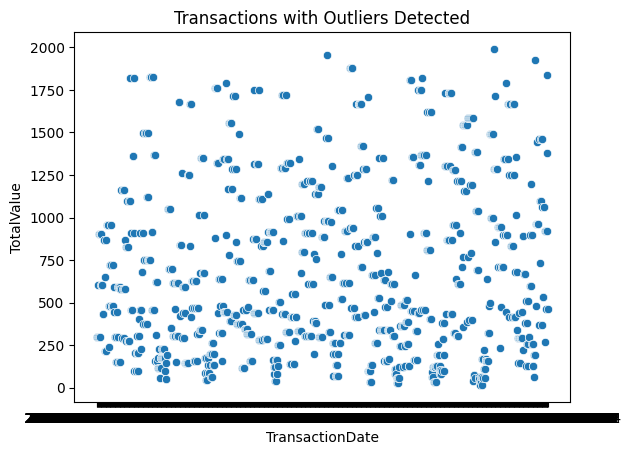

In [ ]:

z_scores = np.abs(stats.zscore(transactions['TotalValue']))
outliers = transactions[z_scores > 3]
print(f"Outliers detected in TotalValue: {len(outliers)}")

# To visualize the outliers, I will plot a scatter plot with transaction dates on the x-axis and total values on the y-axis.
sns.scatterplot(x=transactions['TransactionDate'], y=transactions['TotalValue'])
plt.title('Transactions with Outliers Detected')
plt.show()


Let’s explore the relationships between `TotalValue`, `Quantity`, and `Price` in the transactions dataset by visualizing pairwise scatter plots.


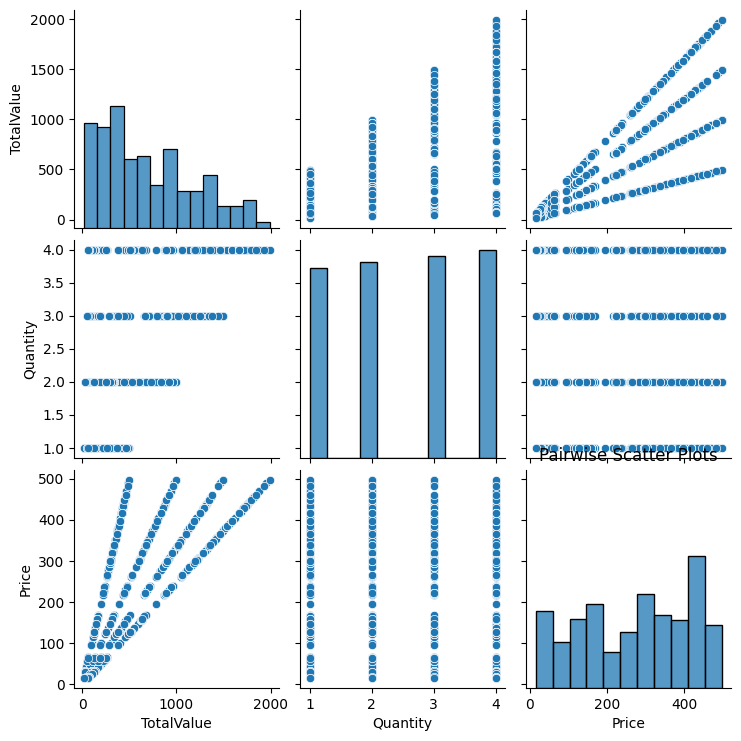

In [ ]:
sns.pairplot(transactions[['TotalValue', 'Quantity', 'Price']])
plt.title('Pairwise Scatter Plots')
plt.show()


In this step, I will segment customers based on their total transaction value and quantity purchased using K-means clustering. This will allow me to identify different customer types, like high-spending customers.


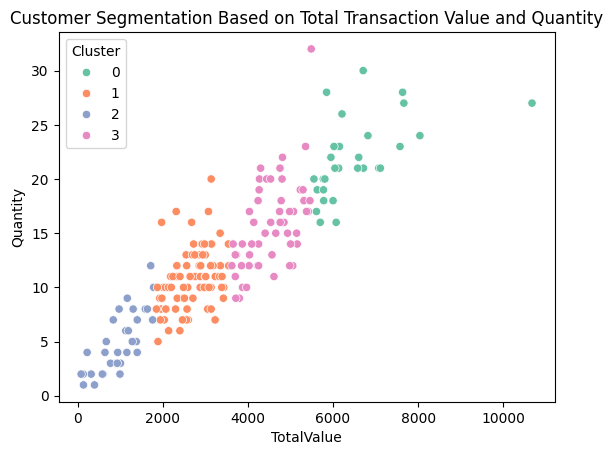

In [ ]:
customer_transactions = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()

# Let's apply K-means clustering (4 clusters) to segment these customers.
kmeans = KMeans(n_clusters=4, random_state=42)
customer_transactions['Cluster'] = kmeans.fit_predict(customer_transactions[['TotalValue', 'Quantity']])

# Visualize the customer clusters based on total value and quantity.
sns.scatterplot(x='TotalValue', y='Quantity', hue='Cluster', data=customer_transactions, palette='Set2')
plt.title('Customer Segmentation Based on Total Transaction Value and Quantity')
plt.show()


I'll now apply Z-score for detecting outliers in the product prices. This will help identify unusually priced products in the 'Products' dataset.

In [ ]:
products['Price_zscore'] = (products['Price'] - products['Price'].mean()) / products['Price'].std()
outliers_products = products[products['Price_zscore'].abs() > 3]
print(f"Outliers detected in Product Prices (Z-Score): {len(outliers_products)}")


Outliers detected in Product Prices (Z-Score): 0


Now, I’ll decompose the total sales over time to observe any underlying trend and seasonality. I’ll first aggregate the transaction data by month, and then apply seasonal decomposition.

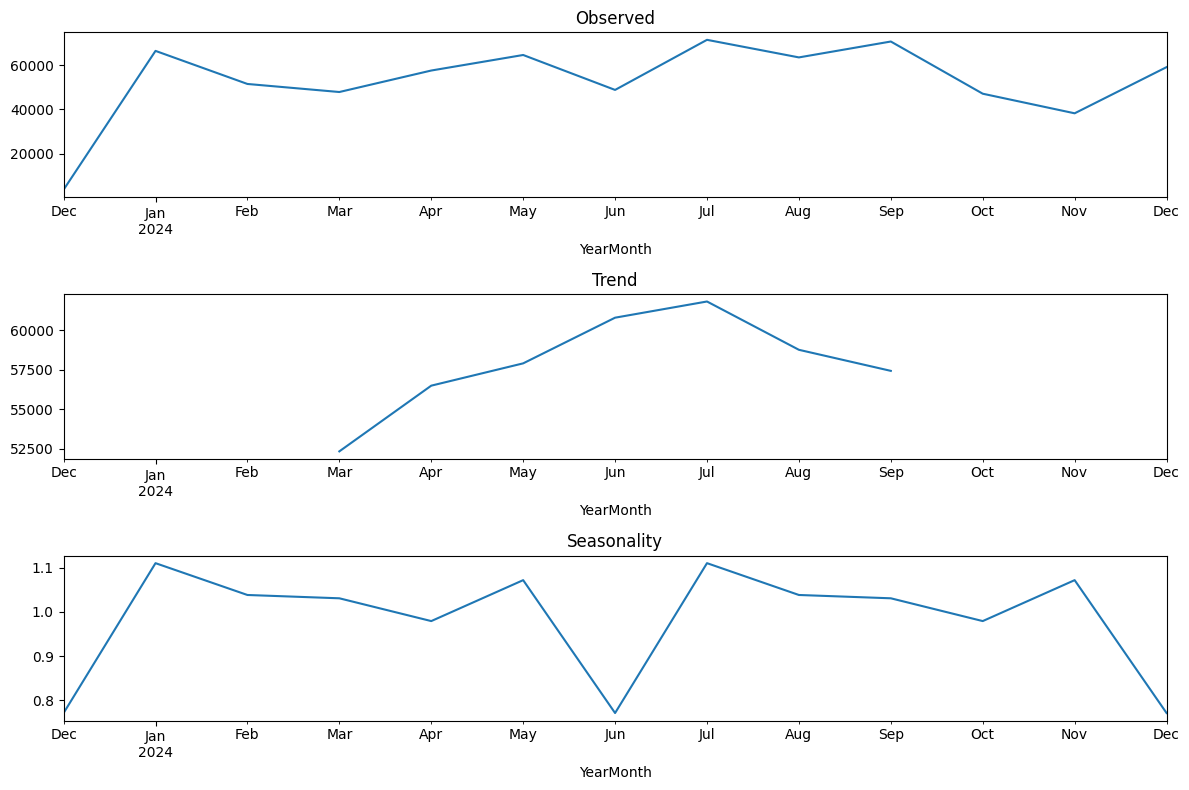

In [ ]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum().reset_index()

# I will use seasonal decomposition to break down the total sales data into trend, seasonality, and observed components.
# If there are fewer than 24 observations, I will adjust the period to 6 (half-yearly data).
monthly_sales.set_index('YearMonth', inplace=True)

if len(monthly_sales) < 24:
    decomposition = seasonal_decompose(monthly_sales['TotalValue'], model='multiplicative', period=6)
else:
    decomposition = seasonal_decompose(monthly_sales['TotalValue'], model='multiplicative', period=12)

# Plot the decomposition results to visualize the observed data, trend, and seasonality.
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonality')
plt.tight_layout()
plt.show()


Generating Insights

In [ ]:
# Insight 1: Total Sales by Region
# Summing up the total transaction value for each region to understand which regions are the most lucrative.
region_sales = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum().reset_index()

# Insight 2: Average Transaction Value by Product Category
# Finding out the average transaction value per product category to understand the value associated with different categories.
category_avg_sales = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].mean().reset_index()

# Insight 3: Number of Transactions per Customer
# Count the number of transactions per customer to analyze customer purchasing behavior and identify high-value customers.
customer_transactions_count = transactions.groupby('CustomerID')['TransactionID'].count().reset_index()

# Insight 4: Customer Segmentation based on Total Purchase Value
# Segment customers based on their total purchase value into three categories: High, Medium, Low.
customer_total_value = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_total_value['Segment'] = pd.cut(customer_total_value['TotalValue'], bins=[0, 100, 500, np.inf], labels=['Low', 'Medium', 'High'])

# Insight 5: Popular Products (Top 10 Products by Total Sales)
# Find out the top 10 products based on the total sales value to understand which products are most popular.
top_products = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
top_products = top_products.merge(products[['ProductID', 'ProductName']], on='ProductID')
top_10_products = top_products.sort_values(by='TotalValue', ascending=False).head(10)

# Displaying all insights at once
print("Insight 1: Total Sales by Region")
print(region_sales)
print("\nInsight 2: Average Transaction Value by Product Category")
print(category_avg_sales)
print("\nInsight 3: Number of Transactions per Customer")
print(customer_transactions_count)
print("\nInsight 4: Customer Segmentation based on Total Purchase Value")
print(customer_total_value[['CustomerID', 'TotalValue', 'Segment']])
print("\nInsight 5: Top 10 Popular Products by Total Sales")
print(top_10_products[['ProductName', 'TotalValue']])


Insight 1: Total Sales by Region
          Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56

Insight 2: Average Transaction Value by Product Category
      Category  TotalValue
0        Books  711.657296
1     Clothing  728.818684
2  Electronics  711.746063
3   Home Decor  608.443266

Insight 3: Number of Transactions per Customer
    CustomerID  TransactionID
0        C0001              5
1        C0002              4
2        C0003              4
3        C0004              8
4        C0005              3
..         ...            ...
194      C0196              4
195      C0197              3
196      C0198              2
197      C0199              4
198      C0200              5

[199 rows x 2 columns]

Insight 4: Customer Segmentation based on Total Purchase Value
    CustomerID  TotalValue Segment
0        C0001     3354.52    High
1        C0002     1862.74    High
2        C0003     2725.38  

# Business Insights

## 1. Region with Highest Total Sales
- South America stands out as the highest-grossing region with a total sales of **$219,352.56**, followed closely by **North America** and **Europe**. America seems to be a key market, so it might be worth focusing more marketing efforts and product lines in this region. Consider conducting market research to tailor offerings specifically for this audience, and explore potential growth opportunities.

## 2. Product Category with the Highest Average Transaction Value
- **Clothing** leads with the highest average transaction value at **$728.82**, followed by **Electronics** and **Books**. This indicates that customers are willing to spend more in these categories. There’s a clear opportunity to expand the clothing category even further. You could introduce bundled promotions, seasonal sales, or special offers on higher-priced clothing items. Additionally, consider introducing related products to further increase the average transaction value.

## 3. High Transaction Frequency Indicates Loyal Customers
- Many customers are showing significant repeat purchase behavior, with some making up to **8 transactions**. This suggests a high level of loyalty and engagement. Loyal customers are your goldmine. You might want to develop exclusive **loyalty programs** or special rewards for frequent shoppers. Consider personalized offers and discounts to keep these customers engaged and coming back for more.

## 4. Customer Segmentation: Most Customers are High-Value
- The majority of customers are classified in the **High** segment based on their total purchase value. This means they are spending significant amounts on their purchases. Since most of your customers are high-value, it would be beneficial to offer them **exclusive deals**, early access to new products, or personalized recommendations based on their purchase history. This could increase customer retention and boost sales even further.

## 5. Top 10 Best-Selling Products
-  Products like the **TechPro Headphones** and **ActiveWear Rug** are among the top 10 best sellers with sales above **$17,000**. These products are clearly resonating with your customers. Capitalize on these popular products by ensuring you have enough stock to meet demand. You could also run targeted campaigns, promote these products more heavily in your marketing efforts, or introduce complementary items to upsell. This will help to maximize the revenue from your best-selling products.

